Разведочный анализ данных

Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from pandas.plotting import scatter_matrix
%matplotlib inline 

Data extraction - загружаем датасет

In [2]:
X_full = pd.read_csv('/Users/levashev/Desktop/METABRIC_RNA_Mutation.csv', low_memory=False)


In [3]:
print(X_full.columns)

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       ...
       'mtap_mut', 'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut',
       'hras_mut', 'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut'],
      dtype='object', length=693)


In [4]:
print(X_full.sample(5)) 
X_full.describe()

      patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
1715        7051             63.44      BREAST CONSERVING  Breast Cancer   
211          342             54.96             MASTECTOMY  Breast Cancer   
1657        6328             75.89             MASTECTOMY  Breast Cancer   
100          191             81.02      BREAST CONSERVING  Breast Cancer   
213          344             59.75      BREAST CONSERVING  Breast Cancer   

                   cancer_type_detailed cellularity  chemotherapy  \
1715   Breast Invasive Ductal Carcinoma        High             0   
211   Breast Invasive Lobular Carcinoma    Moderate             0   
1657   Breast Invasive Ductal Carcinoma        High             0   
100    Breast Invasive Ductal Carcinoma        High             0   
213   Breast Invasive Lobular Carcinoma    Moderate             0   

     pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ...  \
1715                        Her2     4.0             

,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
count,1904.000000,1904.000000,1904.000000,1904.000000,1832.000000,1904.000000,1904.000000,1859.000000,1904.000000,1904.000000,...,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03
mean,3921.982143,61.087054,0.207983,2.643908,2.415939,0.616597,2.002101,5.697687,4.033019,125.121324,...,4.726891e-07,-3.676471e-07,-9.453782e-07,-1.050420e-07,-0.000002,3.676471e-07,4.726891e-07,7.878151e-07,0.000000,3.731842e-18
std,2358.478332,12.978711,0.405971,1.228615,0.650612,0.486343,4.079993,4.058778,1.144492,76.334148,...,1.000263e+00,1.000262e+00,1.000262e+00,1.000263e+00,1.000262,1.000264e+00,1.000262e+00,1.000263e+00,1.000262,1.000262e+00
min,0.000000,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,-2.120800e+00,-3.364800e+00,-2.719400e+00,-4.982700e+00,-2.981700,-3.833300e+00,-3.609300e+00,-1.166900e+00,-2.112600,-1.051600e+00
25%,896.500000,51.375000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.046000,60.825000,...,-6.188500e-01,-6.104750e-01,-6.741750e-01,-6.136750e-01,-0.632900,-6.664750e-01,-7.102000e-01,-5.058250e-01,-0.476200,-7.260000e-01
50%,4730.500000,61.770000,0.000000,3.000000,3.000000,1.000000,0.000000,5.000000,4.042000,115.616667,...,-2.456500e-01,-4.690000e-02,-1.422500e-01,-5.175000e-02,-0.026650,7.000000e-04,-2.980000e-02,-2.885500e-01,-0.133400,-4.248000e-01
75%,5536.250000,70.592500,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,5.040250,184.716667,...,3.306000e-01,5.144500e-01,5.146000e-01,5.787750e-01,0.590350,6.429000e-01,5.957250e-01,6.022500e-02,0.270375,4.284000e-01
max,7299.000000,96.290000,1.000000,5.000000,3.000000,1.000000,45.000000,80.000000,6.360000,355.200000,...,6.534900e+00,1.027030e+01,6.329000e+00,4.571300e+00,12.742300,3.938800e+00,3.833400e+00,1.088490e+01,12.643900,3.284400e+00


In [5]:
X_full.isnull().sum().sort_values(ascending = False)

tumor_stage                  501
3-gene_classifier_subtype    204
primary_tumor_laterality     106
neoplasm_histologic_grade     72
cellularity                   54
                            ... 
mmp15                          0
mmp16                          0
mmp17                          0
mmp19                          0
siah1_mut                      0
Length: 693, dtype: int64

In [6]:
percent = (X_full.isnull().sum()/X_full.isnull().count()).sort_values(ascending = False)

In [7]:
percent.head(25)

tumor_stage                       0.263130
3-gene_classifier_subtype         0.107143
primary_tumor_laterality          0.055672
neoplasm_histologic_grade         0.037815
cellularity                       0.028361
mutation_count                    0.023634
er_status_measured_by_ihc         0.015756
type_of_breast_surgery            0.011555
tumor_size                        0.010504
cancer_type_detailed              0.007878
oncotree_code                     0.007878
tumor_other_histologic_subtype    0.007878
death_from_cancer                 0.000525
ar                                0.000000
bche                              0.000000
akr1c3                            0.000000
akt3                              0.000000
akr1c4                            0.000000
akr1c2                            0.000000
cdk8                              0.000000
cyp11a1                           0.000000
cdkn2c                            0.000000
cyb5a                             0.000000
ackr3      

Воздержимся пока от удаления атрибутов с высоким процентом пустых значений
Пока трансформируем датасет с целью упрощения работы с ним
Отсеиваем генетические признаки и оставляем клинические

In [8]:
X_full.columns[:31]

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       'er_status', 'neoplasm_histologic_grade',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'hormone_therapy',
       'inferred_menopausal_state', 'integrative_cluster',
       'primary_tumor_laterality', 'lymph_nodes_examined_positive',
       'mutation_count', 'nottingham_prognostic_index', 'oncotree_code',
       'overall_survival_months', 'overall_survival', 'pr_status',
       'radio_therapy', '3-gene_classifier_subtype', 'tumor_size',
       'tumor_stage', 'death_from_cancer'],
      dtype='object')

In [9]:
clinical_df = X_full.iloc[:, :31]

In [10]:
clinical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1904 non-null   int64  
 1   age_at_diagnosis                1904 non-null   float64
 2   type_of_breast_surgery          1882 non-null   object 
 3   cancer_type                     1904 non-null   object 
 4   cancer_type_detailed            1889 non-null   object 
 5   cellularity                     1850 non-null   object 
 6   chemotherapy                    1904 non-null   int64  
 7   pam50_+_claudin-low_subtype     1904 non-null   object 
 8   cohort                          1904 non-null   float64
 9   er_status_measured_by_ihc       1874 non-null   object 
 10  er_status                       1904 non-null   object 
 11  neoplasm_histologic_grade       1832 non-null   float64
 12  her2_status_measured_by_snp6    19

In [11]:
clinical_df.head(5)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [12]:
clinical_df.describe()

,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,tumor_size,tumor_stage
count,1904.000000,1904.000000,1904.000000,1904.000000,1832.000000,1904.000000,1904.000000,1859.000000,1904.000000,1904.000000,1904.000000,1904.000000,1884.000000,1403.000000
mean,3921.982143,61.087054,0.207983,2.643908,2.415939,0.616597,2.002101,5.697687,4.033019,125.121324,0.420693,0.597164,26.238726,1.750535
std,2358.478332,12.978711,0.405971,1.228615,0.650612,0.486343,4.079993,4.058778,1.144492,76.334148,0.493800,0.490597,15.160976,0.628999
min,0.000000,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,896.500000,51.375000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.046000,60.825000,0.000000,0.000000,17.000000,1.000000
50%,4730.500000,61.770000,0.000000,3.000000,3.000000,1.000000,0.000000,5.000000,4.042000,115.616667,0.000000,1.000000,23.000000,2.000000
75%,5536.250000,70.592500,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,5.040250,184.716667,1.000000,1.000000,30.000000,2.000000
max,7299.000000,96.290000,1.000000,5.000000,3.000000,1.000000,45.000000,80.000000,6.360000,355.200000,1.000000,1.000000,182.000000,4.000000


In [13]:
clinical_df.describe(include = 'object')

,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,pam50_+_claudin-low_subtype,er_status_measured_by_ihc,er_status,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,oncotree_code,pr_status,3-gene_classifier_subtype,death_from_cancer
count,1882,1904,1889,1850,1904,1874,1904,1904,1904,1889,1904,1904,1798,1889,1904,1700,1903
unique,2,2,6,3,7,2,2,4,2,8,2,11,2,6,2,4,3
top,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumA,Positve,Positive,NEUTRAL,Negative,Ductal/NST,Post,8,Left,IDC,Positive,ER+/HER2- Low Prolif,Living
freq,1127,1903,1500,939,679,1445,1459,1383,1668,1454,1493,289,935,1500,1009,619,801


In [14]:
clinical_df.columns

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       'er_status', 'neoplasm_histologic_grade',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'hormone_therapy',
       'inferred_menopausal_state', 'integrative_cluster',
       'primary_tumor_laterality', 'lymph_nodes_examined_positive',
       'mutation_count', 'nottingham_prognostic_index', 'oncotree_code',
       'overall_survival_months', 'overall_survival', 'pr_status',
       'radio_therapy', '3-gene_classifier_subtype', 'tumor_size',
       'tumor_stage', 'death_from_cancer'],
      dtype='object')

In [15]:
clinical_df['overall_survival'].value_counts()

0    1103
1     801
Name: overall_survival, dtype: int64

In [16]:
clinical_df.shape

(1904, 31)

Выбираем y: логично выбрать overall survival, так как эта информация дает нам однозначный ответ. С точки зрения предсказания - интересней посмотреть overall_survival_months, однако есть риски некорректной интерпретации, так как живых неверно оценивать с точки зрения overall survival months (как мы увидим, корреляция между ними это отчасти подтверждает). Можно выбрать еще death from cancer.
Но, возможно, ситуацию спасет построение кривых КМ

In [17]:
clinical_df.corrwith(clinical_df.overall_survival).sort_values()

/var/folders/vh/hc2rrhwj2815q2zt0v5kkzlw0000gn/T/ipykernel_43292/2737085321.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  clinical_df.corrwith(clinical_df.overall_survival).sort_values()


age_at_diagnosis                -0.303666
tumor_stage                     -0.188790
lymph_nodes_examined_positive   -0.164498
tumor_size                      -0.164361
cohort                          -0.149645
patient_id                      -0.148052
nottingham_prognostic_index     -0.138000
neoplasm_histologic_grade       -0.086601
mutation_count                  -0.077741
hormone_therapy                 -0.030401
chemotherapy                     0.045625
radio_therapy                    0.112083
overall_survival_months          0.384467
overall_survival                 1.000000
dtype: float64

In [18]:
clinical_df.corrwith(clinical_df.overall_survival_months).sort_values()

/var/folders/vh/hc2rrhwj2815q2zt0v5kkzlw0000gn/T/ipykernel_43292/2959182376.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  clinical_df.corrwith(clinical_df.overall_survival_months).sort_values()


tumor_stage                     -0.273498
nottingham_prognostic_index     -0.242773
lymph_nodes_examined_positive   -0.240319
tumor_size                      -0.188135
chemotherapy                    -0.159951
age_at_diagnosis                -0.150158
neoplasm_histologic_grade       -0.121632
hormone_therapy                 -0.105786
radio_therapy                   -0.005822
mutation_count                   0.041647
cohort                           0.089101
patient_id                       0.099731
overall_survival                 0.384467
overall_survival_months          1.000000
dtype: float64

In [19]:
clinical_df.shape

(1904, 31)

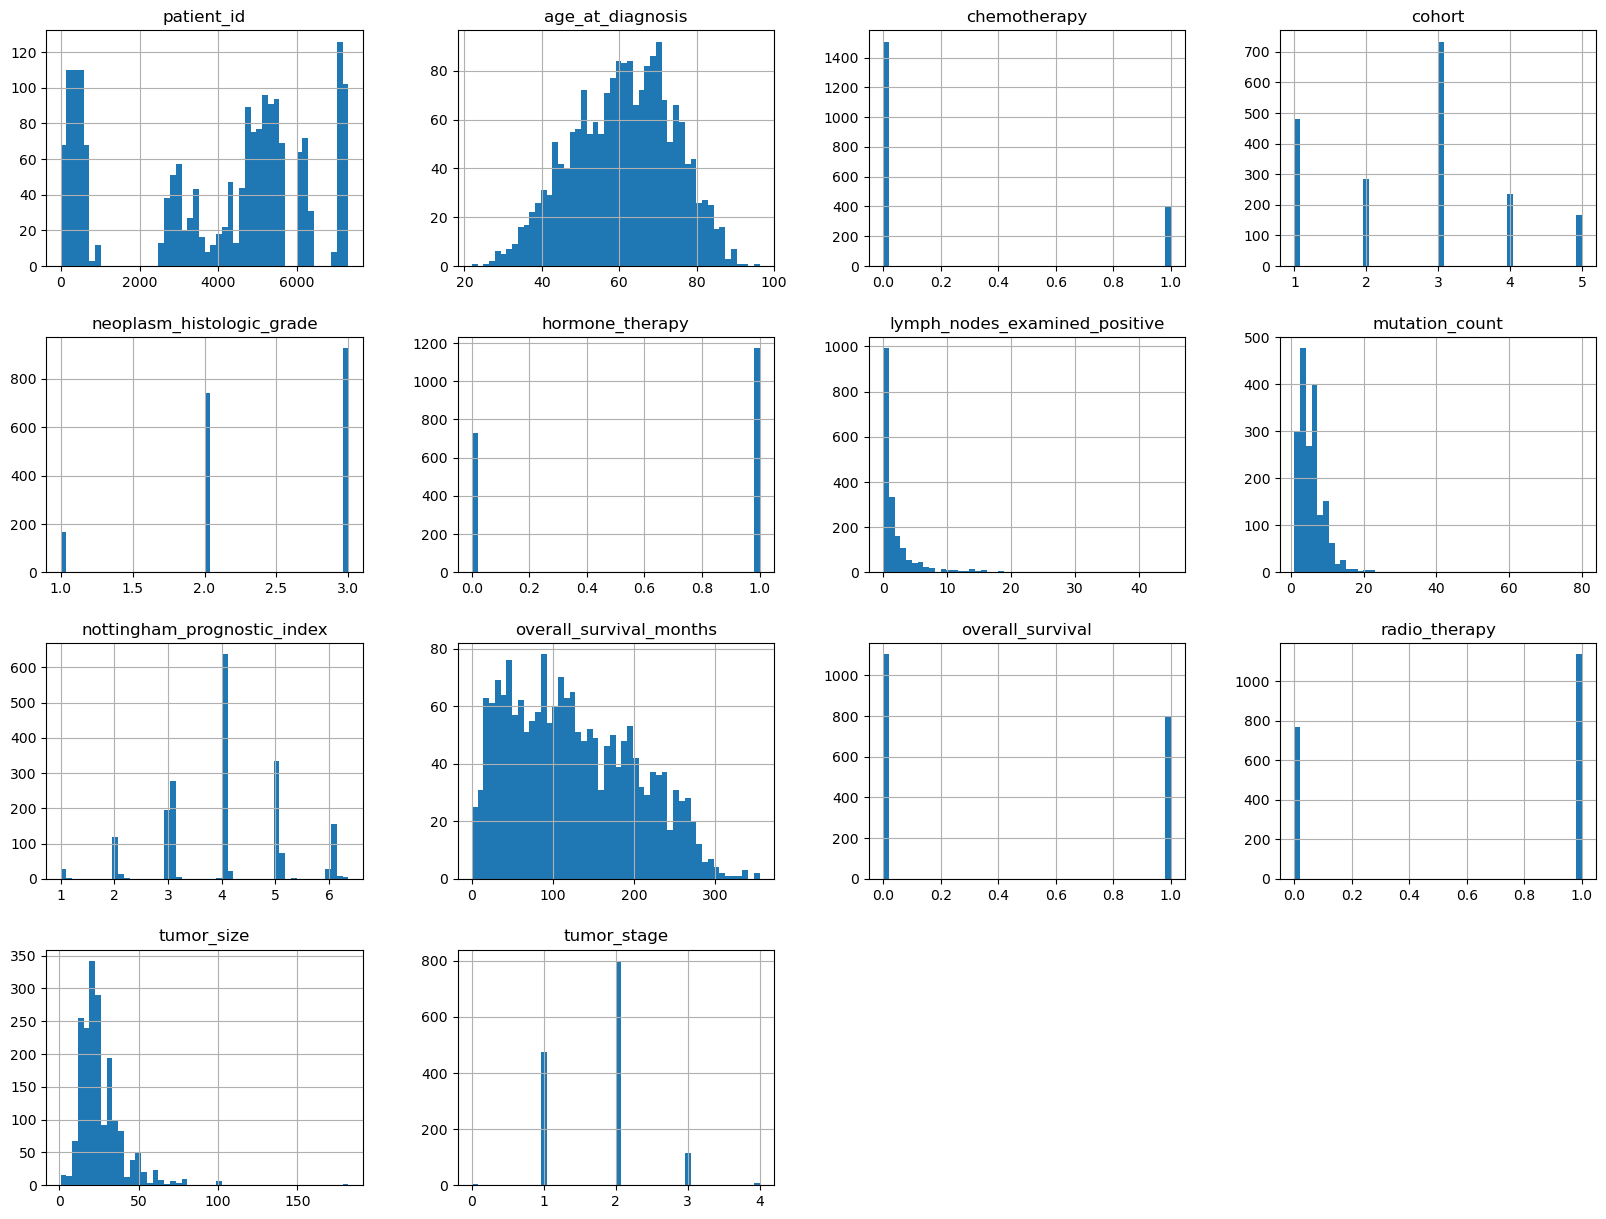

In [20]:
clinical_df.hist(bins=50, figsize=(20,15))
plt.show()

In [21]:
clinical_df_dead = clinical_df.copy()

In [22]:
clinical_df_dead = clinical_df_dead[clinical_df_dead.overall_survival > 0]

In [23]:
clinical_df_dead.shape

(801, 31)

In [24]:
clinical_df_dead.head(5)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
6,14,56.45,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.020,IDC,164.333333,1,Positive,1,NaN,10.0,2.0,Living
11,39,70.91,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,1.0,Positve,...,2.042,IDC,163.533333,1,Positive,1,NaN,21.0,1.0,Living


In [25]:
clinical_df_dead.corrwith(clinical_df_dead.overall_survival_months).sort_values()

/var/folders/vh/hc2rrhwj2815q2zt0v5kkzlw0000gn/T/ipykernel_43292/4132830926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  clinical_df_dead.corrwith(clinical_df_dead.overall_survival_months).sort_values()


hormone_therapy                 -0.252718
age_at_diagnosis                -0.178058
tumor_stage                     -0.135899
lymph_nodes_examined_positive   -0.118001
chemotherapy                    -0.081612
tumor_size                      -0.057701
nottingham_prognostic_index     -0.055605
radio_therapy                   -0.055556
neoplasm_histologic_grade        0.033199
mutation_count                   0.148605
cohort                           0.244264
patient_id                       0.251933
overall_survival_months          1.000000
overall_survival                      NaN
dtype: float64

Мы видим, что с корреляцией лучше не стало...

Попробуем построить кривые КМ

In [26]:
pip install lifelines

Note: you may need to restart the kernel to use updated packages.


In [27]:
from lifelines import KaplanMeierFitter
from lifelines.utils import concordance_index

<AxesSubplot: xlabel='timeline'>

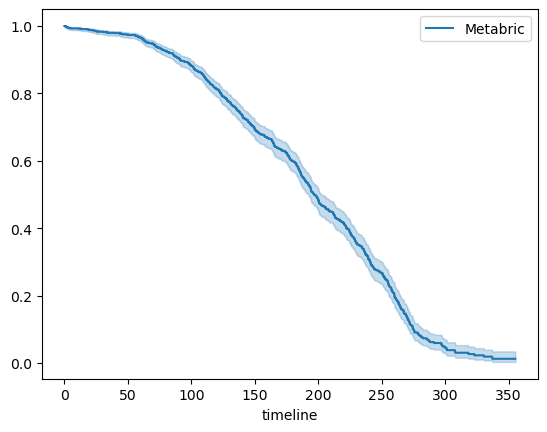

In [28]:
T = clinical_df['overall_survival_months'] 
E = clinical_df['overall_survival']
kmf = KaplanMeierFitter(label='Metabric')
kmf.fit(T,E)
kmf.plot()

In [29]:
from lifelines.utils import median_survival_times

In [30]:
print(kmf.median_survival_time_)

196.8666667


In [31]:
timeline = [60,120,180]

print(kmf.survival_function_at_times(timeline))


60     0.964936
120    0.812065
180    0.598671
Name: Metabric, dtype: float64


Полученные данные выглядят крайне оптимистичными... и в целом не очень согласуются с кривой КМ на сайте проекта https://www.cbioportal.org/study/summary?id=brca_metabric
К тому же, в библиотеке https://lifelines.readthedocs.io/en/latest/fitters/univariate/KaplanMeierFitter.html#id1
1 - event observed, 0 - censored. В датасете же логика иная - 0 - умер, 1 - живой, что, возможно, и привело к изменению расчета кривой

In [32]:
#тогда заменим 0 на 1, а 1 на 0 в столбце overall_survival
clinical_df_inverted = clinical_df.copy()
clinical_df_inverted['overall_survival'] = clinical_df_inverted['overall_survival'].replace([0,1],[1,0])
print(clinical_df_inverted.head(5))

   patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0           0             75.65             MASTECTOMY  Breast Cancer   
1           2             43.19      BREAST CONSERVING  Breast Cancer   
2           5             48.87             MASTECTOMY  Breast Cancer   
3           6             47.68             MASTECTOMY  Breast Cancer   
4           8             76.97             MASTECTOMY  Breast Cancer   

                        cancer_type_detailed cellularity  chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN             0   
1           Breast Invasive Ductal Carcinoma        High             0   
2           Breast Invasive Ductal Carcinoma        High             1   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4  Breast Mixed Ductal and Lobular Carcinoma        High             1   

  pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ...  \
0                 claudin-low     1.0       

In [33]:
clinical_df_inverted['overall_survival'].value_counts()

1    1103
0     801
Name: overall_survival, dtype: int64

<AxesSubplot: xlabel='timeline'>

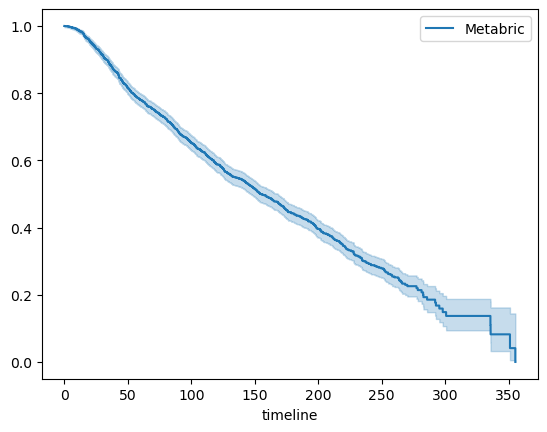

In [34]:
T = clinical_df_inverted['overall_survival_months'] 
E = clinical_df_inverted['overall_survival']
kmf = KaplanMeierFitter(label='Metabric')
kmf.fit(T,E)
kmf.plot()

In [35]:
print(kmf.median_survival_time_)
timeline = [60,120,180]

print(kmf.survival_function_at_times(timeline))

154.5
60     0.779433
120    0.588566
180    0.442187
Name: Metabric, dtype: float64


In [36]:
clinical_df_inverted.corrwith(clinical_df_inverted.overall_survival).sort_values()

/var/folders/vh/hc2rrhwj2815q2zt0v5kkzlw0000gn/T/ipykernel_43292/2253425346.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  clinical_df_inverted.corrwith(clinical_df_inverted.overall_survival).sort_values()


overall_survival_months         -0.384467
radio_therapy                   -0.112083
chemotherapy                    -0.045625
hormone_therapy                  0.030401
mutation_count                   0.077741
neoplasm_histologic_grade        0.086601
nottingham_prognostic_index      0.138000
patient_id                       0.148052
cohort                           0.149645
tumor_size                       0.164361
lymph_nodes_examined_positive    0.164498
tumor_stage                      0.188790
age_at_diagnosis                 0.303666
overall_survival                 1.000000
dtype: float64

In [37]:
clinical_df_inverted.corrwith(clinical_df_inverted.overall_survival_months).sort_values()

/var/folders/vh/hc2rrhwj2815q2zt0v5kkzlw0000gn/T/ipykernel_43292/880763157.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  clinical_df_inverted.corrwith(clinical_df_inverted.overall_survival_months).sort_values()


overall_survival                -0.384467
tumor_stage                     -0.273498
nottingham_prognostic_index     -0.242773
lymph_nodes_examined_positive   -0.240319
tumor_size                      -0.188135
chemotherapy                    -0.159951
age_at_diagnosis                -0.150158
neoplasm_histologic_grade       -0.121632
hormone_therapy                 -0.105786
radio_therapy                   -0.005822
mutation_count                   0.041647
cohort                           0.089101
patient_id                       0.099731
overall_survival_months          1.000000
dtype: float64

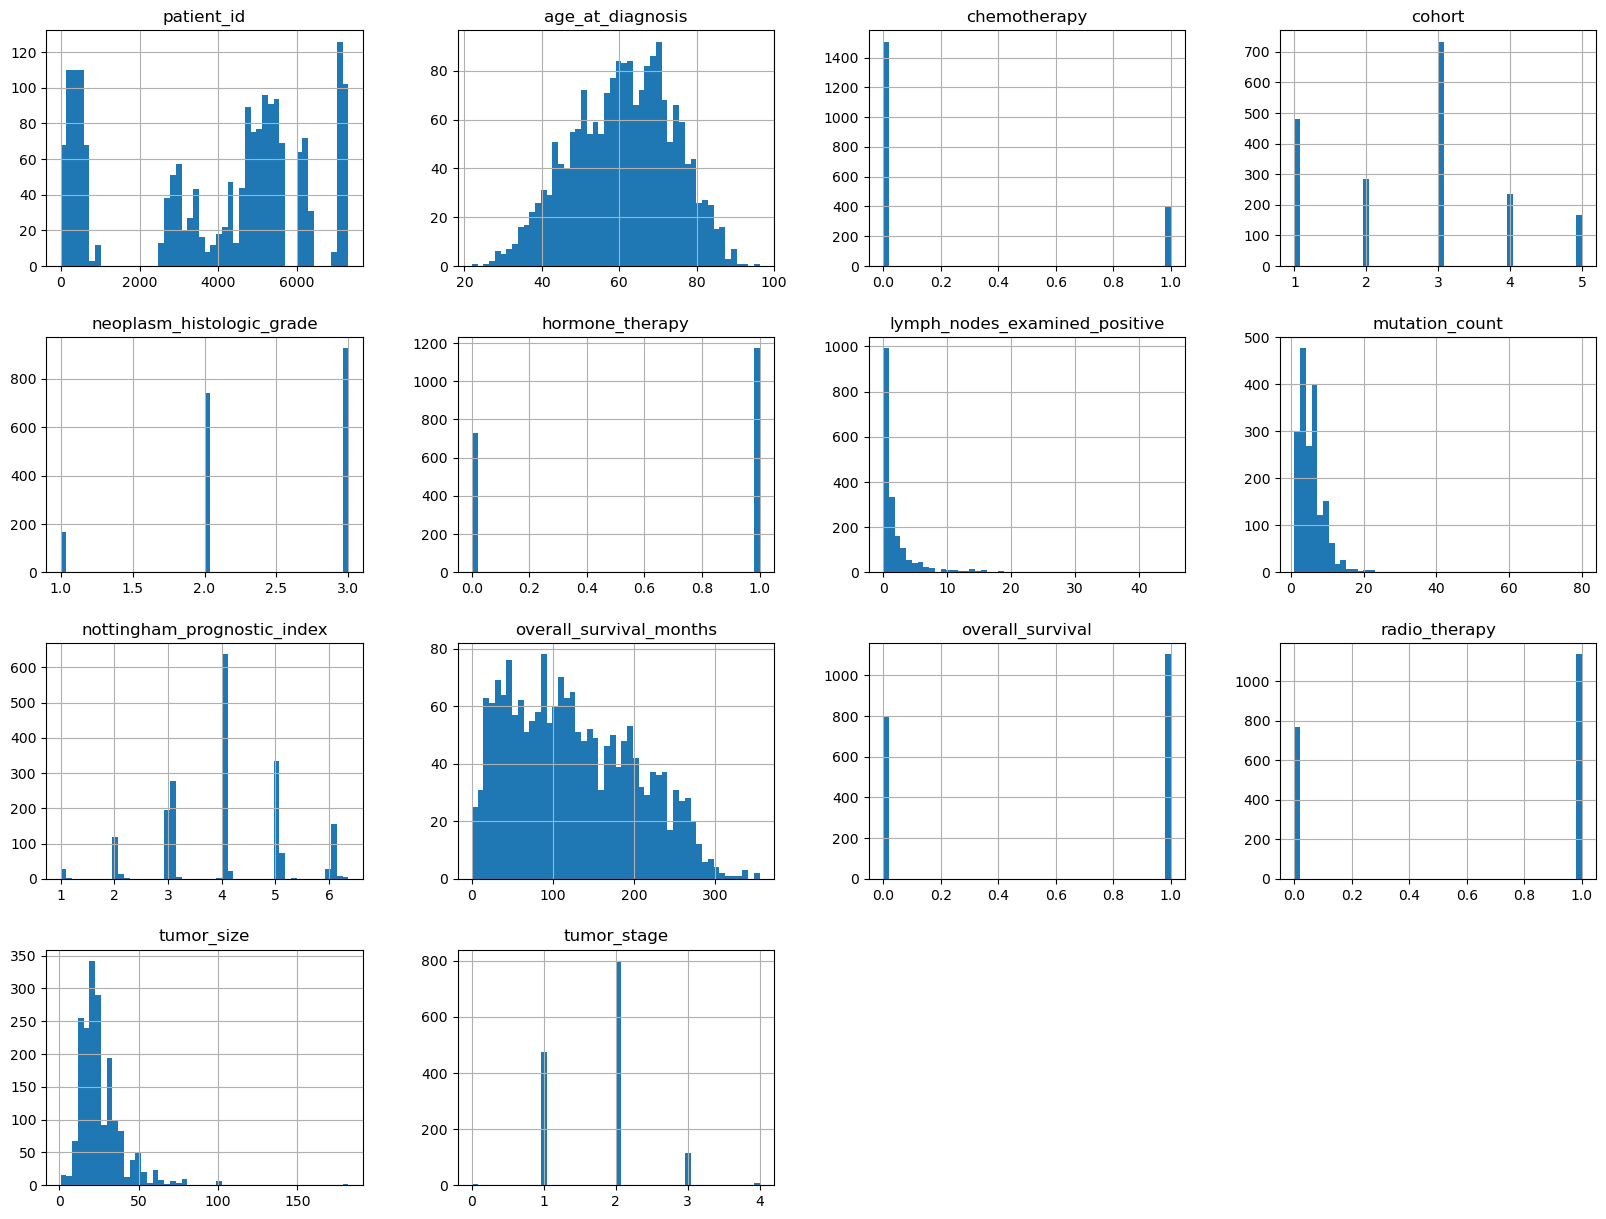

In [38]:
clinical_df_inverted.hist(bins=50, figsize=(20,15))
plt.show()

In [39]:
corr_matrix = clinical_df_inverted.corr()
corr_matrix['overall_survival_months'].sort_values(ascending=True)

/var/folders/vh/hc2rrhwj2815q2zt0v5kkzlw0000gn/T/ipykernel_43292/255833330.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = clinical_df_inverted.corr()


overall_survival                -0.384467
tumor_stage                     -0.273498
nottingham_prognostic_index     -0.242773
lymph_nodes_examined_positive   -0.240319
tumor_size                      -0.188135
chemotherapy                    -0.159951
age_at_diagnosis                -0.150158
neoplasm_histologic_grade       -0.121632
hormone_therapy                 -0.105786
radio_therapy                   -0.005822
mutation_count                   0.041647
cohort                           0.089101
patient_id                       0.099731
overall_survival_months          1.000000
Name: overall_survival_months, dtype: float64

In [40]:
f = 'tumor_stage'
print(clinical_df_inverted[f].unique())
clinical_df_inverted[f].value_counts()

[ 2.  1.  4.  3. nan  0.]


2.0    800
1.0    475
3.0    115
4.0      9
0.0      4
Name: tumor_stage, dtype: int64

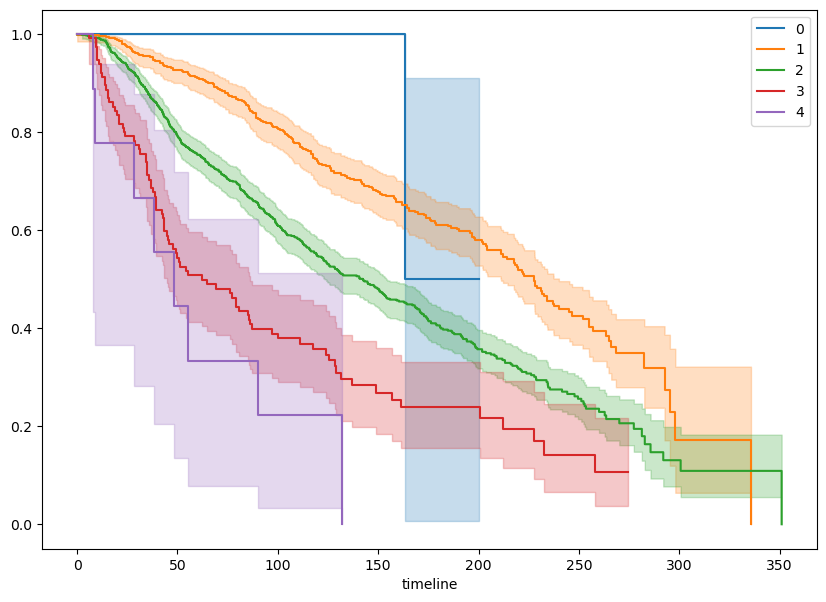

In [41]:
plt.figure(figsize = (10,7))
for a in range(5):
    m = clinical_df_inverted[f] == a
    T = clinical_df_inverted['overall_survival_months'][m] 
    E = clinical_df_inverted['overall_survival'][m]
    kmf = KaplanMeierFitter(label=a)
    kmf.fit(T,E)
    kmf.plot()

In [42]:
f = 'integrative_cluster'
print(clinical_df_inverted[f].unique())
clinical_df_inverted[f].value_counts()

['4ER+' '3' '9' '7' '4ER-' '5' '8' '10' '1' '2' '6']


8       289
3       282
4ER+    244
10      219
5       184
7       182
9       142
1       132
6        84
4ER-     74
2        72
Name: integrative_cluster, dtype: int64

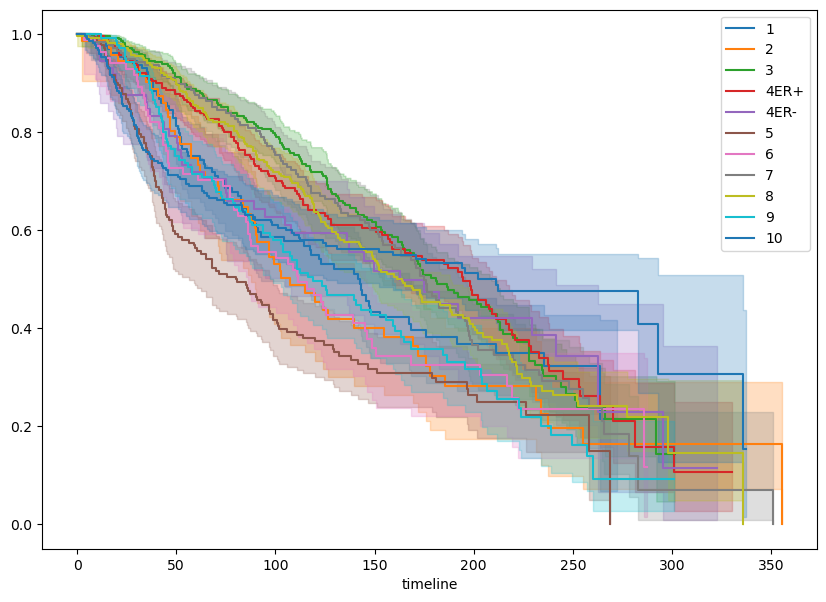

In [43]:
plt.figure(figsize = (10,7))
for a in ['1', '2', '3', '4ER+', '4ER-', '5', '6', '7', '8', '9', '10']:
    m = clinical_df_inverted[f] == a
    T = clinical_df_inverted['overall_survival_months'][m] 
    E = clinical_df_inverted['overall_survival'][m]
    kmf = KaplanMeierFitter(label=a)
    kmf.fit(T,E)
    kmf.plot()

In [44]:
# попробуем все-таки вернуться к кривым КМ, но в sklearn
!pip install scikit-survival

In [45]:
from sksurv.nonparametric import kaplan_meier_estimator

In [56]:
KM_df = clinical_df_inverted.copy()

In [57]:
KM_df[['overall_survival']] = KM_df[['overall_survival']].astype(bool)

In [58]:
KM_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1904 non-null   int64  
 1   age_at_diagnosis                1904 non-null   float64
 2   type_of_breast_surgery          1882 non-null   object 
 3   cancer_type                     1904 non-null   object 
 4   cancer_type_detailed            1889 non-null   object 
 5   cellularity                     1850 non-null   object 
 6   chemotherapy                    1904 non-null   int64  
 7   pam50_+_claudin-low_subtype     1904 non-null   object 
 8   cohort                          1904 non-null   float64
 9   er_status_measured_by_ihc       1874 non-null   object 
 10  er_status                       1904 non-null   object 
 11  neoplasm_histologic_grade       1832 non-null   float64
 12  her2_status_measured_by_snp6    19

Text(0.5, 0, 'time')

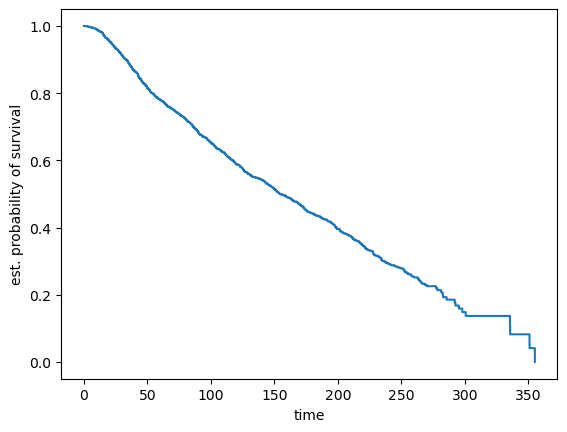

In [62]:
time, survival_prob = kaplan_meier_estimator(KM_df["overall_survival"], KM_df["overall_survival_months"])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival")
plt.xlabel("time")

In [63]:
def to_standard (df):
    
    num_df = df[df.select_dtypes(include = np.number).columns.tolist()]
    
    ss = StandardScaler()
    std = ss.fit_transform(num_df)
    
    std_df = pd.DataFrame(std, index = num_df.index, columns = num_df.columns)
    return std_df

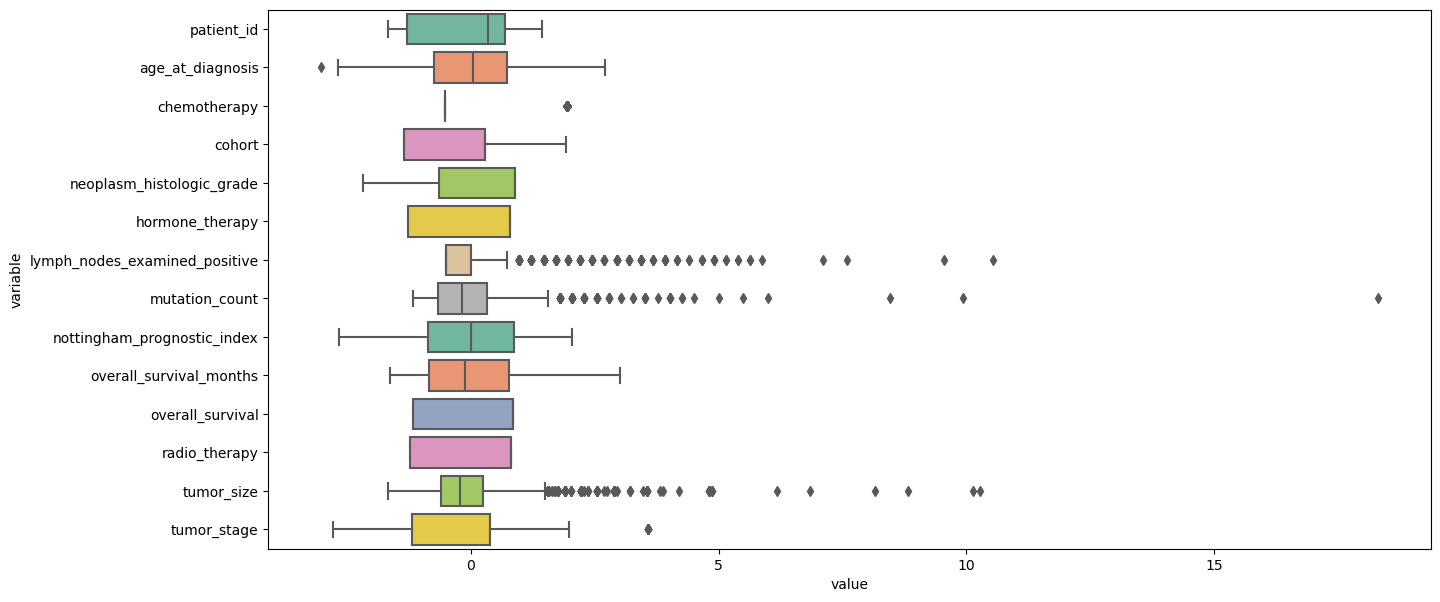

In [64]:
# Анализ аномалий и выбросов
plt.figure(figsize=(15,7))
sns.boxplot(y = "variable", x = "value", data = pd.melt(to_standard(clinical_df_inverted)), palette = 'Set2')
plt.show()

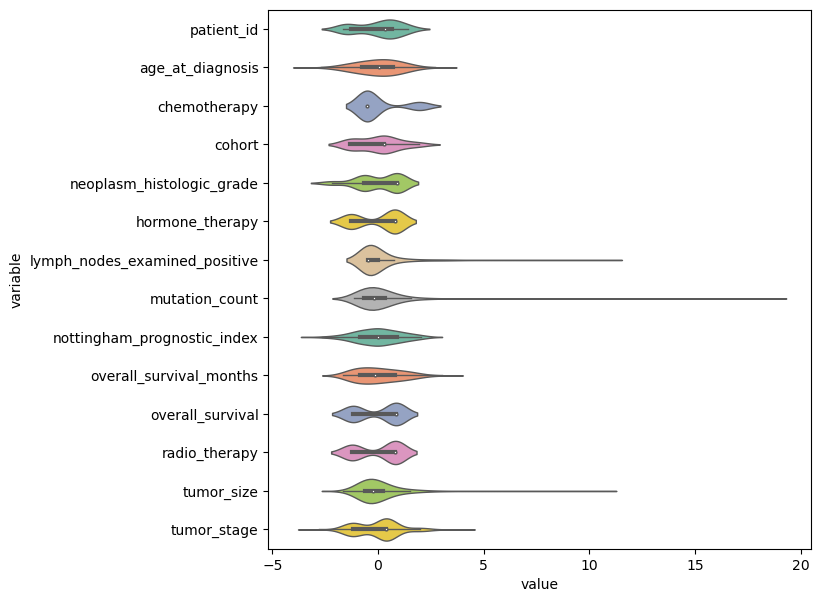

In [65]:
plt.figure(figsize=(7,7))
sns.violinplot(y = "variable", x = "value", data = pd.melt(to_standard(clinical_df_inverted)), palette = 'Set2',bw=.5, linewidth=1)
plt.show()

Итак, разбиваем выборку на train-test

In [66]:
y = clinical_df_inverted.overall_survival_months
clinical_df_inverted.drop(['overall_survival_months'], axis=1, inplace=True)
clinical_df_inverted_train, clinical_df_inverted_test, y_train, y_test = train_test_split(clinical_df_inverted, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)


In [67]:
print(clinical_df_inverted_train.shape)
print(clinical_df_inverted_test.shape)

(1523, 30)
(381, 30)


Проводим очистку данных

In [68]:
clinical_df_inverted_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1523 entries, 996 to 684
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1523 non-null   int64  
 1   age_at_diagnosis                1523 non-null   float64
 2   type_of_breast_surgery          1503 non-null   object 
 3   cancer_type                     1523 non-null   object 
 4   cancer_type_detailed            1511 non-null   object 
 5   cellularity                     1478 non-null   object 
 6   chemotherapy                    1523 non-null   int64  
 7   pam50_+_claudin-low_subtype     1523 non-null   object 
 8   cohort                          1523 non-null   float64
 9   er_status_measured_by_ihc       1502 non-null   object 
 10  er_status                       1523 non-null   object 
 11  neoplasm_histologic_grade       1465 non-null   float64
 12  her2_status_measured_by_snp6    1

удалим несущественные признаки, такие как patient_id, cohort (она не дает нам какой-то информации о популяции)???, а также overall_survival, раз мы выбрали overal_survival_months

итак, отсутствующие значения числовых атрибутов заполнены

займемся категориальными признаками и попробуем выбрать единственный транформатор для удобства обработки числовых и категориальных признаков

In [69]:
num_columns = [cname for cname in clinical_df_inverted_train.columns if 
                clinical_df_inverted_train[cname].dtype in ['int64', 'float64']]
print(num_columns)

['patient_id', 'age_at_diagnosis', 'chemotherapy', 'cohort', 'neoplasm_histologic_grade', 'hormone_therapy', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'overall_survival', 'radio_therapy', 'tumor_size', 'tumor_stage']


In [70]:
cat_columns = [cname for cname in clinical_df_inverted_train.columns if
                    clinical_df_inverted_train[cname].dtype == "object"]
print(cat_columns)

['type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed', 'cellularity', 'pam50_+_claudin-low_subtype', 'er_status_measured_by_ihc', 'er_status', 'her2_status_measured_by_snp6', 'her2_status', 'tumor_other_histologic_subtype', 'inferred_menopausal_state', 'integrative_cluster', 'primary_tumor_laterality', 'oncotree_code', 'pr_status', '3-gene_classifier_subtype', 'death_from_cancer']


In [71]:
my_columns = cat_columns + num_columns
X_train = clinical_df_inverted_train[my_columns].copy()
X_test = clinical_df_inverted_test[my_columns].copy()

In [72]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1523 entries, 996 to 684
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   type_of_breast_surgery          1503 non-null   object 
 1   cancer_type                     1523 non-null   object 
 2   cancer_type_detailed            1511 non-null   object 
 3   cellularity                     1478 non-null   object 
 4   pam50_+_claudin-low_subtype     1523 non-null   object 
 5   er_status_measured_by_ihc       1502 non-null   object 
 6   er_status                       1523 non-null   object 
 7   her2_status_measured_by_snp6    1523 non-null   object 
 8   her2_status                     1523 non-null   object 
 9   tumor_other_histologic_subtype  1511 non-null   object 
 10  inferred_menopausal_state       1523 non-null   object 
 11  integrative_cluster             1523 non-null   object 
 12  primary_tumor_laterality        1

In [73]:
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='most_frequent')),
])
preprocessor = ColumnTransformer(transformers = [('num', num_pipeline, num_columns)])


In [74]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1523 entries, 996 to 684
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   type_of_breast_surgery          1503 non-null   object 
 1   cancer_type                     1523 non-null   object 
 2   cancer_type_detailed            1511 non-null   object 
 3   cellularity                     1478 non-null   object 
 4   pam50_+_claudin-low_subtype     1523 non-null   object 
 5   er_status_measured_by_ihc       1502 non-null   object 
 6   er_status                       1523 non-null   object 
 7   her2_status_measured_by_snp6    1523 non-null   object 
 8   her2_status                     1523 non-null   object 
 9   tumor_other_histologic_subtype  1511 non-null   object 
 10  inferred_menopausal_state       1523 non-null   object 
 11  integrative_cluster             1523 non-null   object 
 12  primary_tumor_laterality        1

In [75]:
cat_pipeline = Pipeline([
    ('ohe', OneHotEncoder(sparse_output=False, handle_unknown="ignore")),
])
preprocessor = ColumnTransformer(transformers = [('cat', cat_pipeline, cat_columns)])

In [76]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_columns),
        ('cat', cat_pipeline, cat_columns)
    ], remainder='passthrough')

In [77]:
!pip install scikit-learn==1.2.0

спасибо подсказке с https://stackoverflow.com/questions/70933014/how-to-use-columntransformer-to-return-a-dataframe

In [78]:
preprocessor.set_output(transform='pandas')
df_pandas = preprocessor.fit_transform(X_train)
df_pandas

,num__patient_id,num__age_at_diagnosis,num__chemotherapy,num__cohort,num__neoplasm_histologic_grade,num__hormone_therapy,num__lymph_nodes_examined_positive,num__mutation_count,num__nottingham_prognostic_index,num__overall_survival,...,cat__pr_status_Positive,cat__3-gene_classifier_subtype_ER+/HER2- High Prolif,cat__3-gene_classifier_subtype_ER+/HER2- Low Prolif,cat__3-gene_classifier_subtype_ER-/HER2-,cat__3-gene_classifier_subtype_HER2+,cat__3-gene_classifier_subtype_nan,cat__death_from_cancer_Died of Disease,cat__death_from_cancer_Died of Other Causes,cat__death_from_cancer_Living,cat__death_from_cancer_nan
996,0.363646,-0.861298,-0.509626,0.282893,-0.634485,0.786442,-0.242274,-0.407161,0.000759,0.857102,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
31,-1.640539,-1.084161,-0.509626,-1.352197,-0.634485,0.786442,-0.480943,-0.645299,-0.835530,-1.166722,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
796,0.085914,-0.516945,-0.509626,0.282893,0.912139,-1.271550,-0.480943,0.069116,0.035898,0.857102,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
457,-1.403700,-0.174140,-0.509626,-1.352197,-0.634485,0.786442,-0.480943,-0.169022,-0.719574,-1.166722,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1146,0.488880,-2.179126,1.962223,0.282893,0.912139,0.786442,3.576434,0.069116,1.775240,0.857102,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.161310,0.188785,-0.509626,0.282893,0.912139,0.786442,-0.003604,-0.645299,0.896784,0.857102,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1216,0.534033,0.506828,-0.509626,0.282893,-0.634485,-1.271550,-0.480943,-0.645299,-0.868911,-1.166722,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1653,1.007711,1.583996,-0.509626,1.917984,0.912139,-1.271550,-0.480943,1.974223,0.044682,0.857102,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
559,-0.472532,0.013900,-0.509626,-0.534652,-0.634485,-1.271550,-0.480943,-0.407161,-0.872425,0.857102,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [79]:
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1523 entries, 996 to 684
Data columns (total 90 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   num__patient_id                                                      1523 non-null   float64
 1   num__age_at_diagnosis                                                1523 non-null   float64
 2   num__chemotherapy                                                    1523 non-null   float64
 3   num__cohort                                                          1523 non-null   float64
 4   num__neoplasm_histologic_grade                                       1523 non-null   float64
 5   num__hormone_therapy                                                 1523 non-null   float64
 6   num__lymph_nodes_examined_positive                                   1523 non-null   float64
 7   num__